In [3]:
import numpy as np
from odes import Lorenz
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pysindy as ps

In [4]:
integrator_keywords = {}
integrator_keywords['rtol'] = 1e-12
integrator_keywords['method'] = 'LSODA'
integrator_keywords['atol'] = 1e-12

In [76]:
dt = .001 
t_train = np.arange(0, 100, dt)
t_train_span = (t_train[0], t_train[-1])
x0_train = [0, -0.01, 9] 
x_train = solve_ivp(Lorenz.rhs, t_train_span,
                    x0_train, t_eval=t_train, **integrator_keywords).y.T
### SINDy

In [77]:
t_train = t_train[50000:]
x_train = x_train[50000:, :]

## Levers We can Pull in SINDy:
- Feature library itself (num of candidate terms, polynomial order)
- Sparsity paramter / STLSQ threshold

In [86]:
poly_order = 5
eps = 0.001 # noise scaling
threshold = 0.05 # lambda or sparsity parameter
model = ps.SINDy(optimizer=ps.STLSQ(threshold=threshold), feature_library=ps.PolynomialLibrary(degree=poly_order))
model.fit(x_train + np.random.normal(scale=eps, size=x_train.shape), t=dt, quiet=True)

SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(degree=5),
      feature_names=['x0', 'x1', 'x2'], optimizer=STLSQ(threshold=0.05))

In [87]:
model.print()

(x0)' = -10.000 x0 + 10.000 x1
(x1)' = 27.998 x0 + -1.000 x1 + -1.000 x0 x2
(x2)' = -2.667 x2 + 1.000 x0 x1


In [88]:
x_sim = model.simulate(x0_train, t_train)

## Ways of reporting error
- Forecasting 
- Capture/correctly identify the underlying equations/parameters - in the case of chaotic systems, does it capture the behaviour on the attractor? Sensitive depdendence on initial conditions precludes long-term forecasting/prediction. 


In [2]:
from odes import SprottA

In [8]:
SprottA.ic()

[0.5, 0.5, 0.5]

In [11]:
dt = .001 
t_train = np.arange(0, 100, dt)
t_train_span = (t_train[0], t_train[-1])
x0_train = SprottA.ic()
x_train = solve_ivp(SprottA.rhs, t_train_span,
                    x0_train, t_eval=t_train, **integrator_keywords).y.T

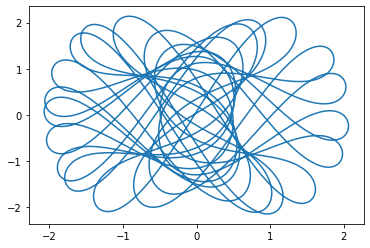

In [16]:
plt.plot(x_train[:,0], x_train[:,2])

In [22]:
poly_order = 5
eps = 0.001 # noise scaling
threshold = 0.05 # lambda or sparsity parameter
model = ps.SINDy(optimizer=ps.STLSQ(threshold=threshold), feature_names=['x', 'y', 'z'], feature_library=ps.PolynomialLibrary(degree=poly_order))
model.fit(x_train, t=dt, quiet=True)

SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(degree=5),
      feature_names=['x', 'y', 'z'], optimizer=STLSQ(threshold=0.05))

In [37]:
model.print()

(x)' = 1.000 y
(y)' = -1.000 x + 1.000 y z
(z)' = 1.000 1 + -1.000 y^2


In [39]:
x_sim = model.simulate(SprottA.ic(), t_train)

In [3]:
from odes import SprottQ, DiffusionlessLorenz

In [5]:
dt = .001 
t_train = np.arange(0, 100, dt)
t_train_span = (t_train[0], t_train[-1])
x0_train = SprottQ.ic()
x_train = solve_ivp(SprottQ.rhs, t_train_span,
                    x0_train, t_eval=t_train, **integrator_keywords).y.T

In [13]:
poly_order = 5
eps = 0.001 # noise scaling
threshold = 0.05 # lambda or sparsity parameter
model = ps.SINDy(optimizer=ps.STLSQ(threshold=threshold), feature_names=['x', 'y', 'z'], feature_library=ps.PolynomialLibrary(degree=poly_order))
model.fit(x_train, t=dt, quiet=True)

SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(degree=5),
      feature_names=['x', 'y', 'z'], optimizer=STLSQ(threshold=0.05))

In [14]:
model.print()

(x)' = -1.000 z
(y)' = 1.000 x + -1.000 y
(z)' = 3.100 x + 0.500 z + 1.000 y^2


In [17]:
dt = .001 
t_train = np.arange(0, 100, dt)
t_train_span = (t_train[0], t_train[-1])
x0_train = DiffusionlessLorenz.ic()
x_train = solve_ivp(DiffusionlessLorenz.rhs, t_train_span,
                    x0_train, t_eval=t_train, **integrator_keywords).y.T

In [25]:
poly_order = 5
eps = 0.001 # noise scaling
threshold = 0.05 # lambda or sparsity parameter
model = ps.SINDy(optimizer=ps.STLSQ(threshold=threshold), feature_names=['x', 'y', 'z'], feature_library=ps.PolynomialLibrary(degree=poly_order))
model.fit(x_train, t=dt, quiet=True)

SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(degree=5),
      feature_names=['x', 'y', 'z'], optimizer=STLSQ(threshold=0.05))

In [26]:
model.print()

(x)' = -1.000 x + -1.000 y
(y)' = -1.000 x z
(z)' = 1.000 1 + 1.000 x y


In [1]:
from odes import DoublePendulum

In [32]:
dt = .001 
t_train = np.arange(0, 100, dt)
l1 = 1
l2 = 1
m1 = 1
m2 = 1
t_train_span = (t_train[0], t_train[-1])
x0_train = DoublePendulum.ic()
x_train = solve_ivp(DoublePendulum.rhs, t_train_span,
                    x0_train, t_eval=t_train, args = [l1, l2, m1, m2], **integrator_keywords).y.T

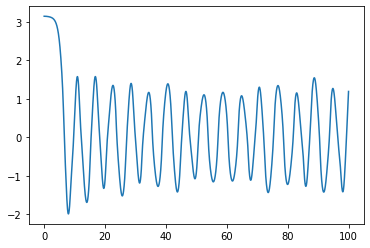

In [33]:
plt.plot(t_train, x_train[:,0])